In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_excel(r"C:\Users\garim\Downloads\Bird Strikes data.xlsx")

In [22]:
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,2011-12-30,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,1500.0,0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,2011-12-30,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0.0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaT,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,2011-12-31,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes


# Exploratory Data Analysis

In [23]:
df.head(1)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes


In [24]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [25]:
df.shape

(25558, 26)

In [26]:
df.describe()

,Record ID,Wildlife: Number Struck Actual,FlightDate,Cost: Total $,Feet above ground,Number of people injured
count,25558.000000,25558.000000,25429,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,2007-01-22 13:20:40.017303040,5.567354e+03,799.028432,0.001056
min,1195.000000,1.000000,2000-01-02 00:00:00,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,2004-06-17 00:00:00,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,2007-07-29 00:00:00,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,2009-11-01 00:00:00,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,2011-12-31 00:00:00,1.239775e+07,18000.000000,6.000000
std,38510.453382,12.793975,NaN,1.219713e+05,1740.079843,0.050420


In [27]:
df.tail(1)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
25557,319593,Airplane,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,1,1,NaN,2011-12-31,Caused damage,...,False,"HIT CENTER OF RADOME, CAVING IN ABOUT 12"". RAD...",Medium,No Cloud,Red-tailed hawk,N,0,0.0,0,Yes


In [13]:
df.dtypes

Record ID                                           int64
Aircraft: Type                                     object
Airport: Name                                      object
Altitude bin                                       object
Aircraft: Make/Model                               object
Wildlife: Number struck                            object
Wildlife: Number Struck Actual                      int64
Effect: Impact to flight                           object
FlightDate                                 datetime64[ns]
Effect: Indicated Damage                           object
Aircraft: Number of engines?                       object
Aircraft: Airline/Operator                         object
Origin State                                       object
When: Phase of flight                              object
Conditions: Precipitation                          object
Remains of wildlife collected?                       bool
Remains of wildlife sent to Smithsonian              bool
Remarks       

In [5]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [6]:
df.drop(['Effect: Impact to flight','Conditions: Precipitation','Remarks'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

Record ID                                    0
Aircraft: Type                             129
Airport: Name                              129
Altitude bin                               129
Aircraft: Make/Model                         0
Wildlife: Number struck                    129
Wildlife: Number Struck Actual               0
FlightDate                                 129
Effect: Indicated Damage                     0
Aircraft: Number of engines?               267
Aircraft: Airline/Operator                 129
Origin State                               449
When: Phase of flight                      129
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Wildlife: Size                             129
Conditions: Sky                              0
Wildlife: Species                            0
Pilot warned of birds or wildlife?         129
Cost: Total $                                0
Feet above ground                          129
Number of peo

In [8]:
df.dropna(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24747 entries, 0 to 25557
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                24747 non-null  int64         
 1   Aircraft: Type                           24747 non-null  object        
 2   Airport: Name                            24747 non-null  object        
 3   Altitude bin                             24747 non-null  object        
 4   Aircraft: Make/Model                     24747 non-null  object        
 5   Wildlife: Number struck                  24747 non-null  object        
 6   Wildlife: Number Struck Actual           24747 non-null  int64         
 7   FlightDate                               24747 non-null  datetime64[ns]
 8   Effect: Indicated Damage                 24747 non-null  object        
 9   Aircraft: Number of engines?             247

# Visuals Depicting the Number of Bird Strikes

In [35]:
df.head(5)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,2000-11-23,Caused damage,2,...,False,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,2001-07-25,Caused damage,2,...,False,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,2001-09-14,No damage,2,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,2002-09-05,No damage,2,...,True,False,Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,2003-06-23,No damage,2,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No


In [43]:
data=df.groupby("Effect: Indicated Damage")["Record ID"].count()

In [47]:
data

Effect: Indicated Damage
Caused damage     2384
No damage        22363
Name: Record ID, dtype: int64

([<matplotlib.patches.Wedge at 0x169c20a62d0>,
 [Text(1.0500066301749895, 0.32785069252414784, 'Caused damage'),
  Text(-1.0500066531966845, -0.32785061879261035, 'No damage')],
 [Text(0.5727308891863578, 0.17882765046771698, '9.63%'),
  Text(-0.572730901743646, -0.17882761025051472, '90.37%')])

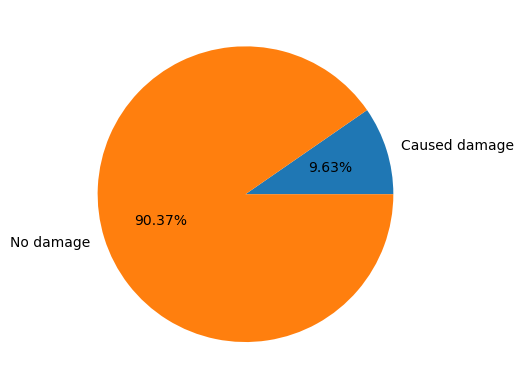

In [71]:
plt.pie(data.values,labels=["Caused damage","No damage"],autopct='%1.2f%%')

# Yearly Analysis & Bird Strikes in the US


In [72]:
df.head(2)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,2000-11-23,Caused damage,2,...,False,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,2001-07-25,Caused damage,2,...,False,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No


In [9]:
df["FlightDate"] = pd.to_datetime(df["FlightDate"])



In [10]:
year = df["FlightDate"].dt.year

In [11]:
year

0        2000
1        2001
2        2001
3        2002
4        2003
         ... 
25552    2011
25553    2011
25554    2011
25556    2011
25557    2011
Name: FlightDate, Length: 24747, dtype: int32

In [12]:
df["Year"]=year

In [13]:
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,2000-11-23,Caused damage,2,...,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,2000
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,2001-07-25,Caused damage,2,...,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,2001-09-14,No damage,2,...,False,Small,No Cloud,European starling,N,0,50.0,0,No,2001
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,2002-09-05,No damage,2,...,False,Small,Some Cloud,European starling,Y,0,50.0,0,Yes,2002
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,2003-06-23,No damage,2,...,False,Small,No Cloud,European starling,N,0,50.0,0,No,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25552,319672,Airplane,SACRAMENTO INTL,< 1000 ft,B-737-700,1,1,2011-12-29,No damage,2,...,True,Medium,No Cloud,Mallard,Y,0,10.0,0,Yes,2011
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,2011-12-30,No damage,2,...,False,Large,Overcast,Unknown bird - large,N,0,1500.0,0,No,2011
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,2011-12-30,No damage,2,...,False,Small,Some Cloud,Tree swallow,Y,0,0.0,0,No,2011
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,2011-12-31,No damage,2,...,False,Medium,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes,2011


In [15]:
data= df.groupby("Year")["Record ID"].count()

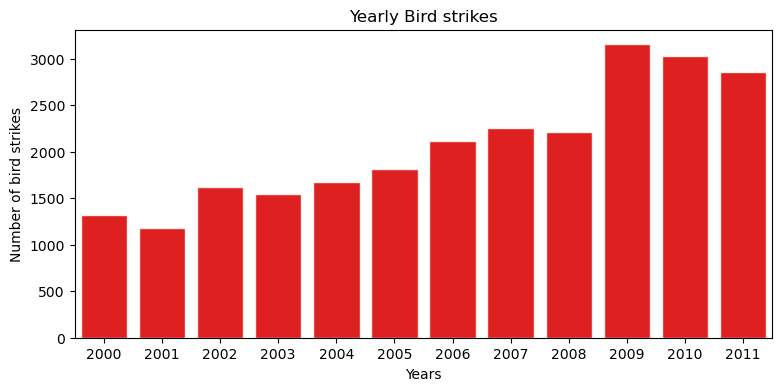

In [16]:
plt.figure(figsize=(9,4))
sns.barplot(x=data.index,y=data.values,color="red",edgecolor="linen")
plt.title("Yearly Bird strikes")
plt.xlabel("Years")
plt.ylabel("Number of bird strikes")
plt.show()

# Top 10 US Airlines in terms of having encountered bird strikes

In [18]:
df.head(5)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,2000-11-23,Caused damage,2,...,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,2000
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,2001-07-25,Caused damage,2,...,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,2001-09-14,No damage,2,...,False,Small,No Cloud,European starling,N,0,50.0,0,No,2001
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,2002-09-05,No damage,2,...,False,Small,Some Cloud,European starling,Y,0,50.0,0,Yes,2002
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,2003-06-23,No damage,2,...,False,Small,No Cloud,European starling,N,0,50.0,0,No,2003


In [33]:
data=df.groupby("Aircraft: Make/Model")["Record ID"].count().sort_values(ascending=False).head(10)
table=pd.DataFrame(data)
table

,Record ID
Aircraft: Make/Model,
B-737-700,2486
B-737-300,2308
CL-RJ100/200,1950
A-320,1157
EMB-145,989
A-319,976
B-757-200,921
MD-82,634
B-737-800,603


# Airports with most incidents of bird strikes – Top 50

In [25]:
df.head(2)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,2000-11-23,Caused damage,2,...,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,2000
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,2001-07-25,Caused damage,2,...,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001


In [27]:
data=df.groupby("Airport: Name")["Record ID"].count().sort_values(ascending=False).head(50)

In [28]:
table=pd.DataFrame(data)

In [29]:
table

,Record ID
Airport: Name,
DALLAS/FORT WORTH INTL ARPT,802
SACRAMENTO INTL,676
SALT LAKE CITY INTL,479
DENVER INTL AIRPORT,476
KANSAS CITY INTL,452
PHILADELPHIA INTL,442
ORLANDO INTL,408
BALTIMORE WASH INTL,401
LOUISVILLE INTL ARPT,394


# Yearly Cost Incurred due to Bird Strikes:

In [34]:
df.head(2)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,2000-11-23,Caused damage,2,...,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,2000
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,2001-07-25,Caused damage,2,...,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001


In [37]:
data=df.groupby("Year")["Cost: Total $"].sum()

In [42]:
df.groupby("Year")["Cost: Total $"].sum()

Year
2000     5041825
2001    21860525
2002     8919504
2003    13174490
2004     8086573
2005     7025996
2006    18228216
2007     8641474
2008    11803009
2009     9258223
2010    10686111
2011    13015223
Name: Cost: Total $, dtype: int64

Text(0, 0.5, 'Cost in Millions')

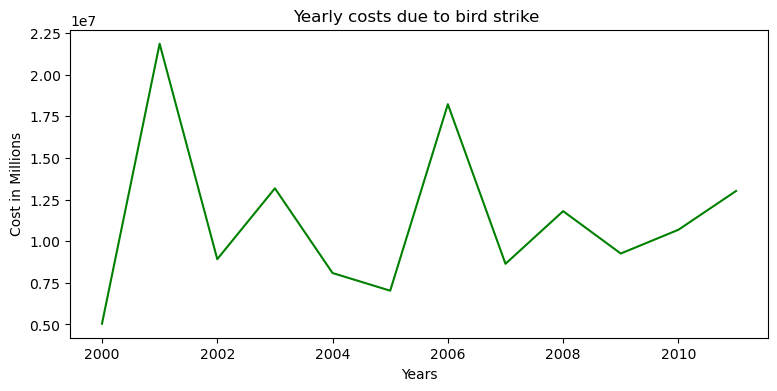

In [45]:
plt.figure(figsize=(9,4))
plt.plot(data.index, data.values,color='green')
plt.title("Yearly costs due to bird strike ")
plt.xlabel("Years")
plt.ylabel("Cost in Millions")

# When do most bird strikes occur?

In [47]:
df.head(5)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,2000-11-23,Caused damage,2,...,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,2000
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,2001-07-25,Caused damage,2,...,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,2001-09-14,No damage,2,...,False,Small,No Cloud,European starling,N,0,50.0,0,No,2001
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,2002-09-05,No damage,2,...,False,Small,Some Cloud,European starling,Y,0,50.0,0,Yes,2002
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,2003-06-23,No damage,2,...,False,Small,No Cloud,European starling,N,0,50.0,0,No,2003


In [50]:
df.groupby("Feet above ground")["Record ID"].count().sort_values(ascending=False).head(1)

Feet above ground
0.0    9587
Name: Record ID, dtype: int64

#### Most of the bird strikes occur when the airplane is 0 feet above the ground

# Altitude of aeroplanes at the time of strike


In [52]:
data=df.groupby("Altitude bin")["Record ID"].count()

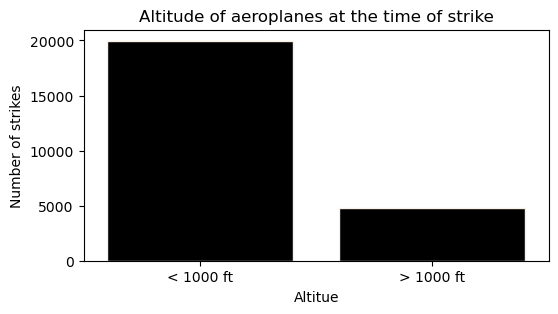

In [57]:
plt.figure(figsize=(6,3))
sns.barplot(x=data.index,y=data.values,color='black',edgecolor='linen')
plt.title("Altitude of aeroplanes at the time of strike")
plt.xlabel("Altitue")
plt.ylabel("Number of strikes")
plt.show()

# Effect of Bird Strikes & Impact on Flight

In [60]:
df.head(2)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No


In [63]:
data=df.groupby("Effect: Impact to flight")["Record ID"].count()

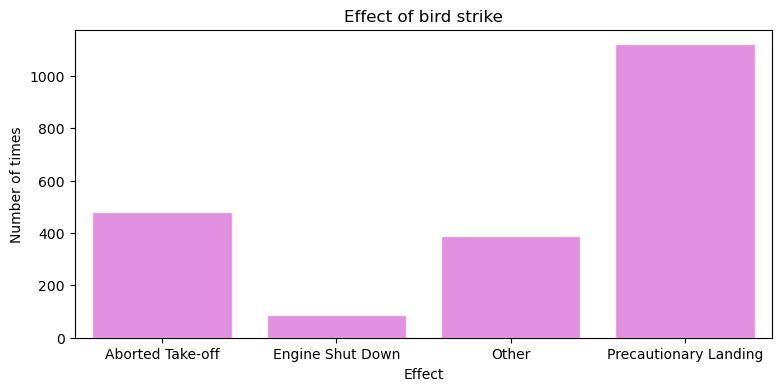

In [65]:
plt.figure(figsize=(9,4))
sns.barplot(x=data.index,y=data.values,color='violet',edgecolor='linen')
plt.title("Effect of bird strike")
plt.xlabel("Effect")
plt.ylabel("Number of times")
plt.show()

# Effect of Strike at Different Altitude


In [83]:
data=df.groupby(["Feet above ground","Effect: Impact to flight"])["Effect: Impact to flight"].count()

In [84]:
table=pd.DataFrame(data)

In [85]:
table.head(5)

Effect: Impact to flight
Feet above ground Effect: Impact to flight                          
0.0               Aborted Take-off                               469
                  Engine Shut Down                                33
                  Other                                          154
                  Precautionary Landing                          243
1.0               Precautionary Landing                            1

In [76]:
data=df.groupby(["Effect: Indicated Damage","Altitude bin"])["Record ID"].count()

In [79]:
table=pd.DataFrame(data)

In [81]:
table

Record ID
Effect: Indicated Damage Altitude bin           
Caused damage            < 1000 ft          1702
                         > 1000 ft           752
No damage                < 1000 ft         18854
                         > 1000 ft          4121

In [86]:
data=df.groupby(["Effect: Impact to flight","Altitude bin"])["Record ID"].count()

In [87]:
data

Effect: Impact to flight  Altitude bin
Aborted Take-off          < 1000 ft       479
Engine Shut Down          < 1000 ft        74
                          > 1000 ft        14
Other                     < 1000 ft       310
                          > 1000 ft        80
Precautionary Landing     < 1000 ft       878
                          > 1000 ft       243
Name: Record ID, dtype: int64

In [88]:
table=pd.DataFrame(data)

In [89]:
table

Record ID
Effect: Impact to flight Altitude bin           
Aborted Take-off         < 1000 ft           479
Engine Shut Down         < 1000 ft            74
                         > 1000 ft            14
Other                    < 1000 ft           310
                         > 1000 ft            80
Precautionary Landing    < 1000 ft           878
                         > 1000 ft           243

# Were Pilots Informed? & Prior Warning and Effect of Strike Relation

In [90]:
df.head(3)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No


In [92]:
data=df.groupby(["Pilot warned of birds or wildlife?","Effect: Indicated Damage"])["Record ID"].count()

In [93]:
data.index

MultiIndex([('N', 'Caused damage'),
            ('N',     'No damage'),
            ('Y', 'Caused damage'),
            ('Y',     'No damage')],
           names=['Pilot warned of birds or wildlife?', 'Effect: Indicated Damage'])

In [94]:
data.values

array([ 1532, 13035,   922,  9940], dtype=int64)

In [95]:
table=pd.DataFrame(data)

In [96]:
table

Record ID
Pilot warned of birds or wildlife? Effect: Indicated Damage           
N                                  Caused damage                  1532
                                   No damage                     13035
Y                                  Caused damage                   922
                                   No damage                      9940

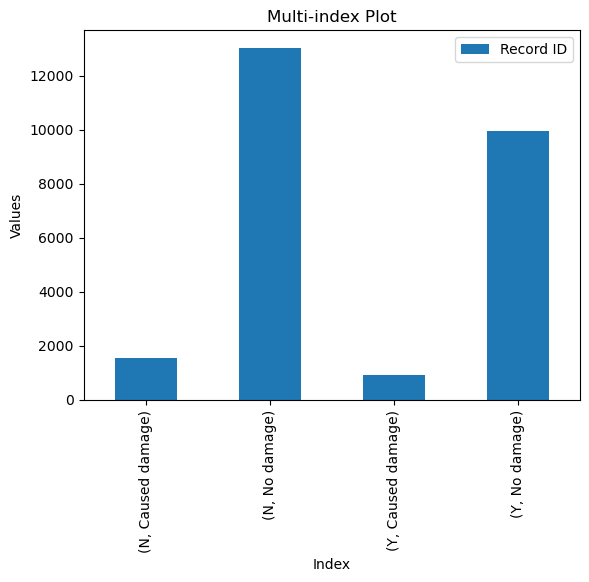

In [99]:
table.plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Multi-index Plot')
plt.show()

In [100]:
data=df.groupby(["Pilot warned of birds or wildlife?","Effect: Impact to flight"])["Record ID"].count()

In [101]:
data

Pilot warned of birds or wildlife?  Effect: Impact to flight
N                                   Aborted Take-off            250
                                    Engine Shut Down             52
                                    Other                       248
                                    Precautionary Landing       619
Y                                   Aborted Take-off            229
                                    Engine Shut Down             36
                                    Other                       142
                                    Precautionary Landing       502
Name: Record ID, dtype: int64

In [109]:
table=pd.DataFrame(data)

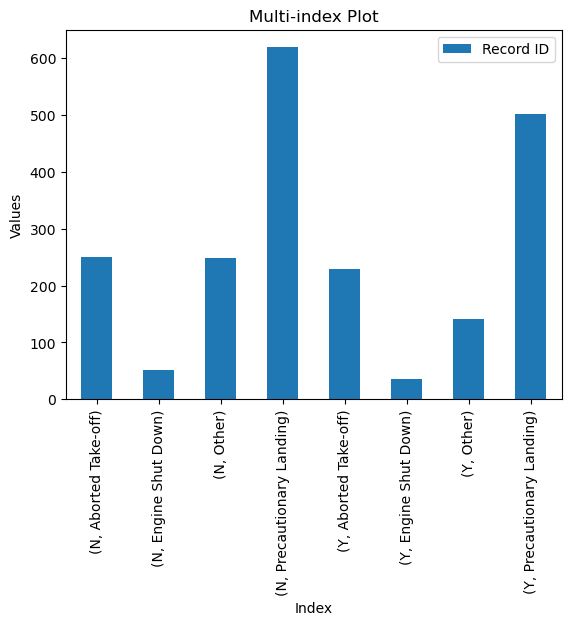

In [111]:
table.plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Multi-index Plot')
plt.show()